In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from matplotlib import rc
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep
from IPython import display

In [2]:
def factorial(n):
    for n_j in np.arange(1, n, 1):
        n*=n_j
    return n

In [19]:
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt"
filename="DatosMaximo.txt"
urllib.request.urlretrieve(url,filename)
data=np.loadtxt(filename)

In [20]:
def Maximos(data):
    r = []
    t_arr = data[1:] - data[:-1]
    for i in range(0, len(t_arr)):
        if i>0:
            if t_arr[i][1] < 0 and t_arr[i-1][1] > 0:
                r.append(i)
    return data[r]

In [21]:
v = Maximos(data)

In [22]:
plt.plot(data[:,0], data[:,1])
plt.scatter(v[:,0], v[:,1])

In [23]:
def fibonacci(n):
    rs = [0, 1]
    for i in range(0, n-2):
        t = np.sum(rs[-2:])
        rs.append(t)
    return np.array(rs)

In [24]:
rs = fibonacci(20)
print(rs)

[   0    1    1    2    3    5    8   13   21   34   55   89  144  233
  377  610  987 1597 2584 4181]


In [25]:
x_values = np.linspace(0, len(rs), len(rs))
plt.plot(x_values, rs, color='red', linestyle='dashed', linewidth=2)
plt.title("Fibonacci")
plt.xlabel("n")
plt.ylabel("Fn")

Text(22.527777777777786, 0.5, 'Fn')

<IPython.core.display.Javascript object>


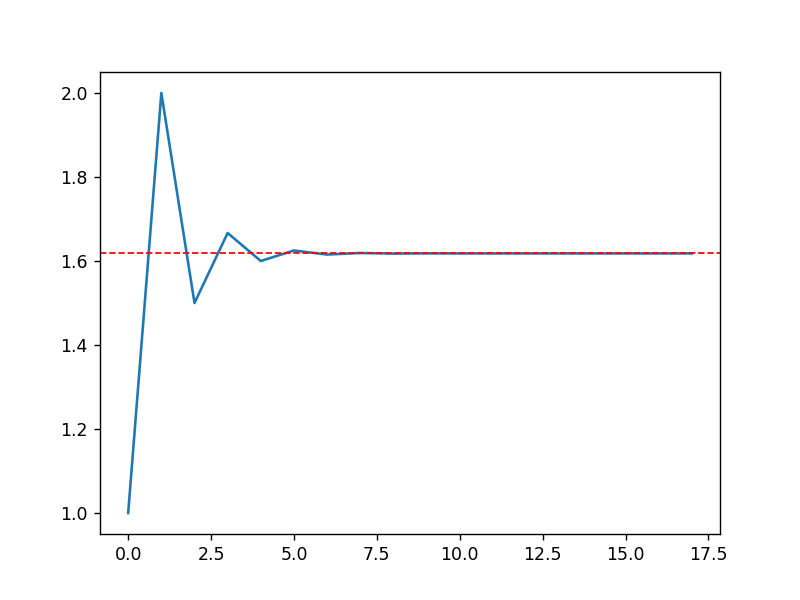

In [26]:

apr = rs[2:]/rs[1:-1]
au = (1 + np.sqrt(5))/2
fig, ax = plt.subplots()
ax.plot(apr)

ax.axhline(y=au, color='r', linestyle='dashed', linewidth=1)

plt.show()

In [36]:
class Particle:
    
    def __init__(self,r0,v0,a0,t,m=1,radius=0.3,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.radius = radius
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def CheckLimits(self,Limits):
        
        for i in range(2):
        
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
    
    def Distance(self, other):
        return np.linalg.norm(self.r - other.r)
    
    def Collision(self, other, k):
        if self.Distance(other) < self.radius + other.radius:
            #Para modificar los valores en x e y de la posicion y de la velocidad necesitamos una dirección (n^)
            #y magnitud específica. A continuación se sacará la dirección y se normalizará, para que luego
            #Se multiplique por la magnitud correcta.
            r = self.Distance(other)/2
            Dir = self.r - r
            print(Dir)
            Dir_norm = Dir/(np.linalg.norm(Dir))
            a = k*((r*2)**3)
            A = a*Dir_norm
            print(A)
            #Se modifican los valores de la aceleración (En evolution se actualizan los valores de posición y velocidad en
            #términos de la aceleración)
            self.a = A
            other.a = -1*A
            
    

In [37]:
def RunSimulation1(t,Wall, K):
    
    r0 = np.array([-15.,1.])
    v0 = np.array([10.,0.])
    a0 = np.array([0.,0.])
    
    p1 = Particle(r0,v0,a0,t)
    
    r0_2 = np.array([0., -1.5])
    v0_2 = np.array([0., 0.])
    a0_2 = np.array([0., 0.])
    p2 = Particle(r0_2, v0_2, a0_2, t)
    
    Wall_ = Wall.copy()
    
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        p1.Evolution(it)
        p2.Evolution(it)
        p1.CheckLimits(Wall_)
        p2.CheckLimits(Wall_)
        p1.Collision(p2, K)
    
    return p1, p2

In [38]:
# Region
Limits = np.array([[-20.,20.],[-20.,20.]])
Limits

array([[-20.,  20.],
       [-20.,  20.]])

In [39]:
dt = 0.05
tmax = 10
K = 1
t = np.arange(0.,tmax,dt)
Particles = RunSimulation1(t,Limits,K)

Running simulation: 100%|████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 65.02 Steps/s]


In [40]:
scale = 1
t = t[::scale]

<IPython.core.display.Javascript object>


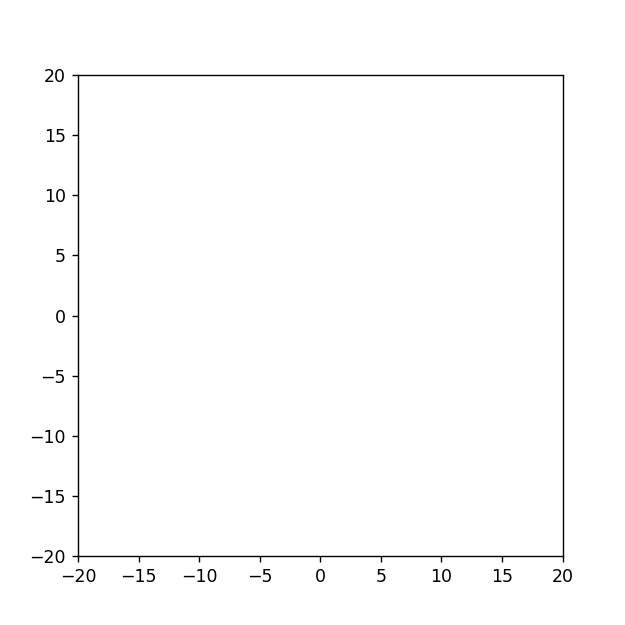

In [41]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    
    x_1 = Particles[0].GetPosition(scale)[i,0]
    y_1 = Particles[0].GetPosition(scale)[i,1]
    vx = Particles[0].GetVelocity(scale)[i,0]
    vy = Particles[0].GetVelocity(scale)[i,1]
    
    x_2 = Particles[1].GetPosition(scale)[i,0]
    y_2 = Particles[1].GetPosition(scale)[i,1]
    vx_2 = Particles[1].GetVelocity(scale)[i,0]
    vy_2 = Particles[1].GetVelocity(scale)[i,1]
    
    
    circle = plt.Circle((x_1,y_1),Particles[0].radius, fill=True, color='k')
    circle_2 = plt.Circle((x_2,y_2),Particles[1].radius, fill=True, color='k')
    ax.add_patch(circle)
    ax.add_patch(circle_2)
    
    ax.arrow(x,y,vx,vy,color='r',head_width=0.2,length_includes_head=True)
    
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)
plt.show()